In [1]:
from mdagent import MDAgent
import os

In [2]:
descriptive_prompt_8 = "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD of the simulation at 300 K. 5. Compute the radius of gyration over time for the simulation at 300 K. 6. Simulate for 1 ps at 400 K. 7. Compute the RMSD of the simulation at 400 K. 8. Compute the radius of gyration over time for the simulation at 400 K."
non_descriptive_prompt_8 = "Simulate 1LYZ for 1 ps at 300K and 400K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD and radius of gyration of both simulations."

In [3]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [4]:
#todays date and time
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2025-01-14
time: 14:24:31


# descriptive prompt

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [6]:
agent_1.run(descriptive_prompt_8)

Thought: Let's solve this step by step. First, let's download the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have downloaded the PDB file, let's analyze its structure to get information about residues, chains, and beta sheets.

Action:
```
{
    "action": "GetTurnsBetaSheetsHelices",
    "action_input": {
        "query": "1LYZ",
        "primary_accession": "P00698"
    }
}
```

Thought: Let me continue with the next steps. Now that we have the PDB file and structural information, let's set up and run the first simulation at 300K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_142434",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

PDB file found with this ID: 1LYZ


Thought

: Now that we have downloaded the PDB file,

 let's analyze its structure to get

 information about residues, chains, and beta sheets

.

Action:
```
{
    

"action": "GetTurnsBetaShe

etsHelices",
    "action_input

": {
        "query": "1LY

Z",
        "primary_acc

ession": "P00698

"
    }
}
```

Thought: Let me continue

 with the next steps. Let

's set up and run the first

 simulation at 300K.

Action:


```
{
    "action

": "SetUpandRunFunction

",
    "action_input

": {
        "pdb_id": "

1LYZ_161

615",
        "forc

efield_files": ["amber

14-all.xml", "amber14/

tip3pfb.xml"],


        "system

_params": {
            "

nonbondedMethod": "PM

E",
            "nonbondedC

utoff": "1.0 *

 nanometers",
            "constraints": "

HBonds",
            "rig

idWater": true,


            "constraintTolerance": 0

.000001,
            "

ewaldErrorTolerance

": 0.0005,
            "s

olvate": true
        },
        "

integrator_params": {
            

"integrator_type": "L

angevinMiddle",
            "Temperature

": "300 * kelvin

",
            "Friction": "1.0

 / picoseconds",
            "

Timestep": "0.002 * pic

oseconds"
        },
        

"simulation_params": {
            "

Ensemble": "NPT",
            "

Number of Steps": 500

,
            "record_interval_

steps": 10,
            "recor

d_params": ["step", "pot

entialEnergy", "temperature

", "density"]
        }


    }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
Error adding solvent ValueError – No template found for residue 1 (LYS).  The set of atoms is similar to HID, but it is missing 8 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought: I see the issue. We

 need to clean the PDB file first

 to ensure it's properly prepare

d for simulation. Let's clean

 it and then try the simulation again.

Action

:
```
{


    "action":

 "CleaningTool

Function",
    "action

_input": {
        "pdb_

id": "1LY

Z_161615",


        "replace_non

standard_residues": true,
        

"add_missing_atoms

": true,
        

"remove_heterogens": true,


        "remove_

water": true,
        "ad

d_hydrogens": true,
        "ad

d_hydrogens_ph

": 7.0


    }
}
```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_77/pdb/1LYZ_raw_20250110_161615.pdb


Thought: Now that we have a cleaned PDB file,

 let's try running the simulation at

 300K again.

Action:
```


{
    "action": "SetUp

andRunFunction",
    "action_input

": {
        "pdb_id":

 "1LYZ_161630",


        "forcefield_files": ["amber14

-all.xml", "amber14/tip

3pfb.xml"],
        "system

_params": {
            "nonbon

dedMethod": "PME",
            "

nonbondedCutoff": "1

.0 * nanometers",
            

"constraints": "HBonds",
            

"rigidWater": true,
            

"constraintTolerance": 0.

000001,
            "ewaldErrorT

olerance": 0.0005,


            "solvate": true
        },


        "integrator_params": {


            "integrator_type": "Lan

gevinMiddle",
            "Temperature":

 "300 * kelvin",
            "

Friction": "1.0 / pic

oseconds",
            "Timestep":

 "0.002 * picoseconds"


        },
        "simulation_params":

 {
            "Ensemble": "NPT

",
            "Number of Steps": 500

,
            "record_interval_steps":

 10,
            "record_params":

 ["step", "pot

entialEnergy", "

temperature", "density"]
        }
    

}
}
```



Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b98b8f3e760> >


KeyError: 'Pressure'

In [4]:
registry = agent_1.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_89
Files found in registry: 1LYZ_142434: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_142434
 1LYZ_142450: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_142454: Initial positions for simulation sim0_142454
 sim0_142454: Basic Simulation of Protein 1LYZ_142450
 rec0_142458: Simulation trajectory for protein 1LYZ_142450 and simulation sim0_142454
 rec1_142458: Simulation state log for protein 1LYZ_142450 and simulation sim0_142454
 rec2_142458: Simulation pdb frames for protein 1LYZ_142450 and simulation sim0_142454
 rmsd_142454: RMSD for 142454
 fig0_143614: RMSD plot for 142454
 rgy_rec0_142458: Radii of gyration per frame for rec0_142458
 fig0_143618: Plot of radii of gyration over time for rec0_142458
 top_sim0_143623: Initial positions for simulation sim0_143623
 sim0_143623: Basic Simulation of Protein 1LYZ_142450
 rec0_143627: Simul

In [5]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_id1 = matches[0]
traj_id2 = matches[1]
traj_path1 = registry.get_mapped_path(traj_id1)
traj_path2 = registry.get_mapped_path(traj_id2)
assert os.path.exists(traj_path1)
assert os.path.exists(traj_path2)

matches = re.findall(r"top_sim0_\d+", paths_and_descriptions)
top_id1 = matches[0]
top_id2 = matches[1]
top_path1 = registry.get_mapped_path(top_id1)
top_path2 = registry.get_mapped_path(top_id2)
assert os.path.exists(top_path1)
assert os.path.exists(top_path2)
print(f"It's asserted that file paths for {traj_id1}, {top_id1}, {traj_id2} and {top_id2} exist")

It's asserted that file paths for rec0_142458, top_sim0_142454, rec0_142458 and top_sim0_143623 exist


In [6]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

print("From first simulation:")
traj_path1 = registry.get_mapped_path(traj_id1)
top_path1 = registry.get_mapped_path(top_id1)
traj = md.load(traj_path1, top=top_path1)[0] # first frame
secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

From first simulation:
Number of residues in total:  6927
Number of chains:  3
Number of residues in sheets:  16
Number of residues in helices:  51
Number of residues in coils:  62


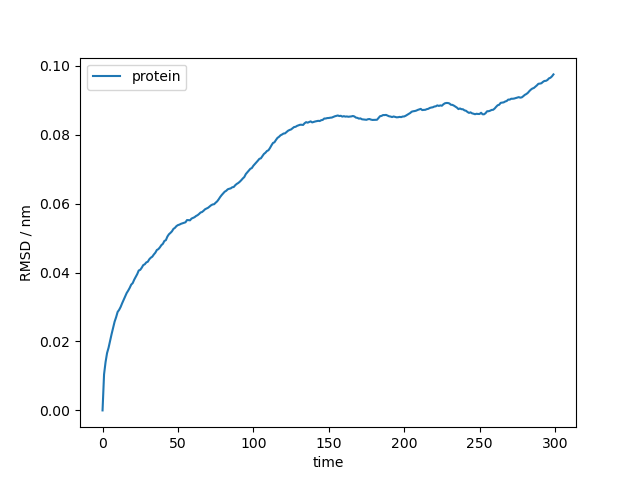

In [7]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

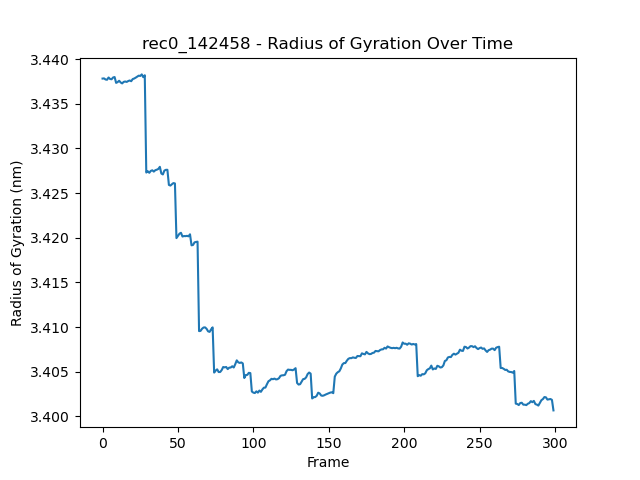

In [8]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

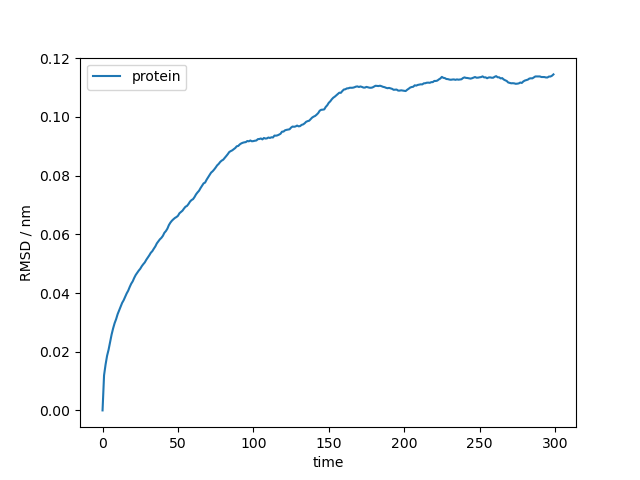

In [9]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)

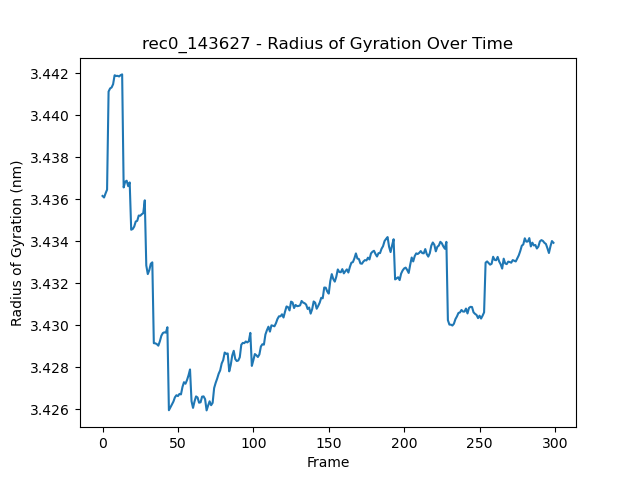

In [10]:
fig_id4 = matches[3]
fig_path4 = registry.get_mapped_path(fig_id4)
assert os.path.exists(fig_path4), f"This figure {fig_id4} does not exist."
Image(filename=fig_path4)

# non-descriptive prompt

In [14]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [15]:
agent_2.run(non_descriptive_prompt_8)

Thought: I'll break this down into steps:
1. First, download the 1LYZ structure
2. Set up and run simulations at both temperatures
3. Analyze the structure and results

Let's start by downloading 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I'll set up and run the first simulation at 300K. I'll modify the integrator parameters for this temperature.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_144732",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "constraintTolerance": 0.000001,
            "ewaldErrorTolerance": 0.0005,
            "solvate": true
        },
        "integrato

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro


{
    "action": "P

DBFileDownloader",
    "action_

input": "1LYZ"


}
```



PDB file found with this ID: 1LYZ


Thought

: Now that I have the

 PDB file, I'll run

 simulations at both temperatures. I'll nee

d to set up and run two simulations with

 different temperatures. Let me start with 300K.

Action

:
```
{
    "action":

 "SetUpandRunFunction",
    "

action_input": {
        "pdb

_id": "1LYZ_

161644",
        "forc

efield_files": ["amber14

-all.xml",

 "amber14/tip3pf

b.xml"],
        "save

": true,
        "

system_params": {
            "

nonbondedMethod": "PM

E",
            "nonbondedC

utoff": "1.0 *

 nanometers",
            "constraints": "

HBonds",
            

"rigidWater": true,


            "constraintT

olerance": 0

.000001,
            "ew

aldErrorTolerance": 0.0

005,
            "s

olvate": true
        },
        "

integrator_params": {
            

"integrator_type": "L

angevinMiddle",
            "Temperature

": "300 * kelvin",
            

"Friction": "1.

0 / picoseconds",
            "

Timestep": "0.002 * pic

oseconds"
        },
        "simulation

_params": {
            "Ensemble

": "NPT",
            "

Number of Steps": 500,
            "recor

d_interval_steps": 10,
            "recor

d_params": ["step", "pot

entialEnergy", "temperature", "density

"]
        }
    }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3


Error adding solvent ValueError – No template found for residue 1 (LYS).  The set of atoms is similar to HID, but it is missing 8 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought: I see the issue. We

 need to clean and prepare the PDB file

 first to ensure all residues are compatible

 with the forcefield. Let's use

 the cleaning tool before running the simulation.



Action:
```
{
    "action

": "CleaningTool

Function",
    "action_input": {


        "pdb_id": "1L

YZ_161644",
        "replace

_nonstandard_residues": true,
        

"add_missing_atoms": true,
        

"remove_heterogens": true,


        "remove_water": true,


        "add_hydrogens": true

,
        "add_hydro

gens_ph": 7.0


    }
}


```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_78/pdb/1LYZ_raw_20250110_161644.pdb


Thought: Now that we have a clean

 structure, let's try running the simulation at

 300K again.

Action:


```
{
    "action": "Set

UpandRunFunction",
    "action_

input": {
        "pdb_i

d": "1LYZ_161654",


        "forcefield_files": ["amber

14-all.xml", "amber14/

tip3pfb.xml"],
        "

save": true,
        "system_params

": {
            "nonbondedMetho

d": "PME",
            "nonb

ondedCutoff": "1.0

 * nanometers",
            "constraints

": "HBonds",
            "rig

idWater": true,
            "constra

intTolerance": 0.000001

,
            "ewaldErrorTolerance

": 0.0005,
            "

solvate": true
        },
        

"integrator_params": {
            "

integrator_type": "Langevin

Middle",
            "Temperature": "300

 * kelvin",
            "Friction

": "1.0 / picoseconds

",
            "Timestep": "0

.002 * picoseconds"
        

},
        "simulation_params": {


            "Ensemble": "NPT",


            "Number of Steps": 500,


            "record_interval_steps": 10

,
            "record_params": ["step

", "potentialEnergy", "temperature",

 "density"]
        }
    }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b98baa1a490> >


KeyError: 'Pressure'

In [16]:
registry = agent_2.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_95
Files found in registry: 1LYZ_144732: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_144732
 1LYZ_144743: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_144748: Initial positions for simulation sim0_144748
 sim0_144748: Basic Simulation of Protein 1LYZ_144743
 rec0_144752: Simulation trajectory for protein 1LYZ_144743 and simulation sim0_144748
 rec1_144752: Simulation state log for protein 1LYZ_144743 and simulation sim0_144748
 rec2_144752: Simulation pdb frames for protein 1LYZ_144743 and simulation sim0_144748
 top_sim0_145647: Initial positions for simulation sim0_145647
 sim0_145647: Basic Simulation of Protein 1LYZ_144743
 rec0_145651: Simulation trajectory for protein 1LYZ_144743 and simulation sim0_145647
 rec1_145651: Simulation state log for protein 1LYZ_144743 and simulation sim0_145647
 rec2_145651: Simulation pdb frames for

In [11]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_id1 = matches[0]
traj_id2 = matches[1]
traj_path1 = registry.get_mapped_path(traj_id1)
traj_path2 = registry.get_mapped_path(traj_id2)
assert os.path.exists(traj_path1)
assert os.path.exists(traj_path2)

matches = re.findall(r"top_sim0_\d+", paths_and_descriptions)
top_id1 = matches[0]
top_id2 = matches[1]
top_path1 = registry.get_mapped_path(top_id1)
top_path2 = registry.get_mapped_path(top_id2)
assert os.path.exists(top_path1)
assert os.path.exists(top_path2)
print(f"It's asserted that file paths for {traj_id1}, {top_id1}, {traj_id2} and {top_id2} exist")

It's asserted that file paths for rec0_142458, top_sim0_142454, rec0_142458 and top_sim0_143623 exist


In [12]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

print("From first simulation:")
traj_path1 = registry.get_mapped_path(traj_id1)
top_path1 = registry.get_mapped_path(top_id1)
traj = md.load(traj_path1, top=top_path1)[0] # first frame
secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

From first simulation:
Number of residues in total:  6927
Number of chains:  3
Number of residues in sheets:  16
Number of residues in helices:  51
Number of residues in coils:  62


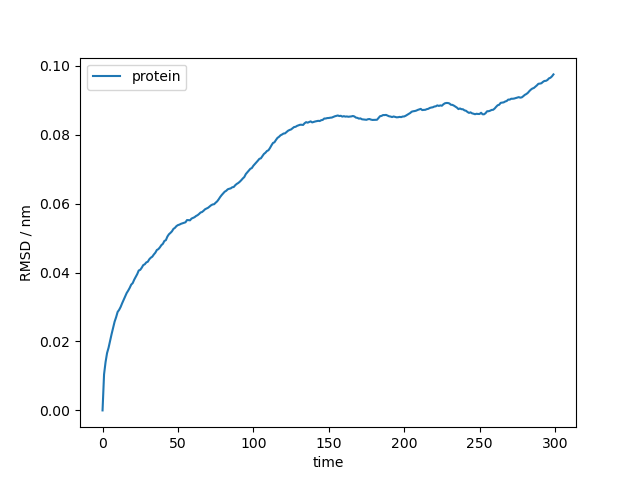

In [13]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

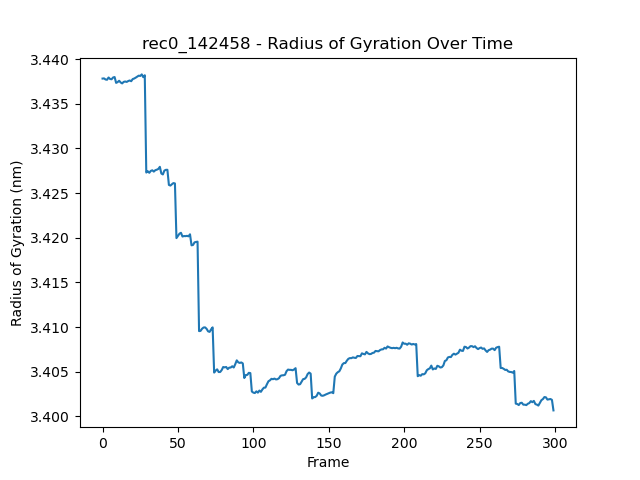

In [14]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

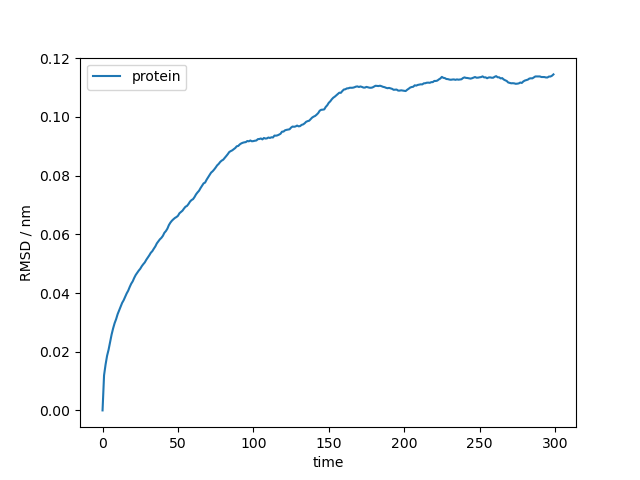

In [15]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)

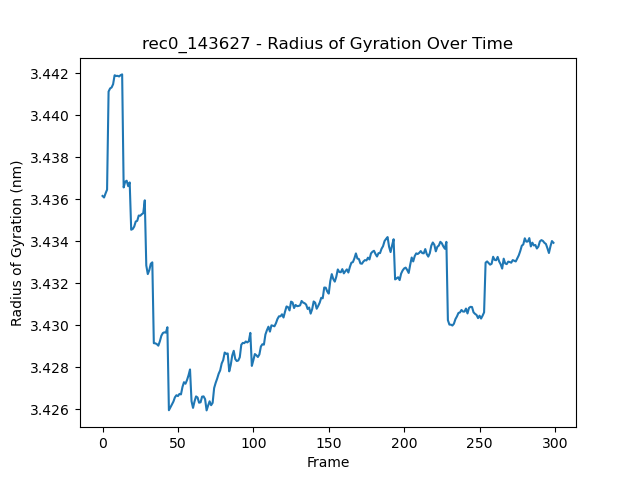

In [16]:
fig_id4 = matches[3]
fig_path4 = registry.get_mapped_path(fig_id4)
assert os.path.exists(fig_path4), f"This figure {fig_id4} does not exist."
Image(filename=fig_path4)